In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Understanding the data

In [4]:
df.isnull().sum()      #Checking for any null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
for i in df.columns:    
    
    print(f'{i}\t:',df[i].nunique())

age	: 41
sex	: 2
cp	: 4
trestbps	: 49
chol	: 152
fbs	: 2
restecg	: 3
thalach	: 91
exang	: 2
oldpeak	: 40
slope	: 3
ca	: 5
thal	: 4
target	: 2


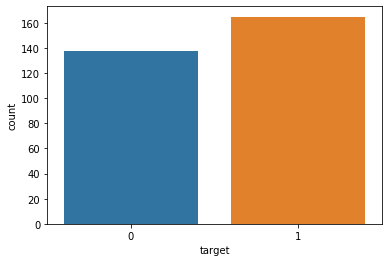

In [6]:
sns.countplot(df.target)

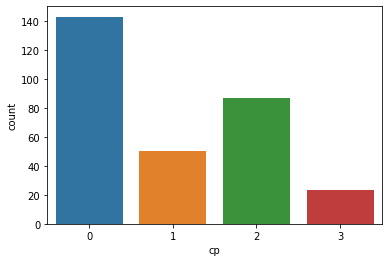

In [7]:
sns.countplot(df.cp)

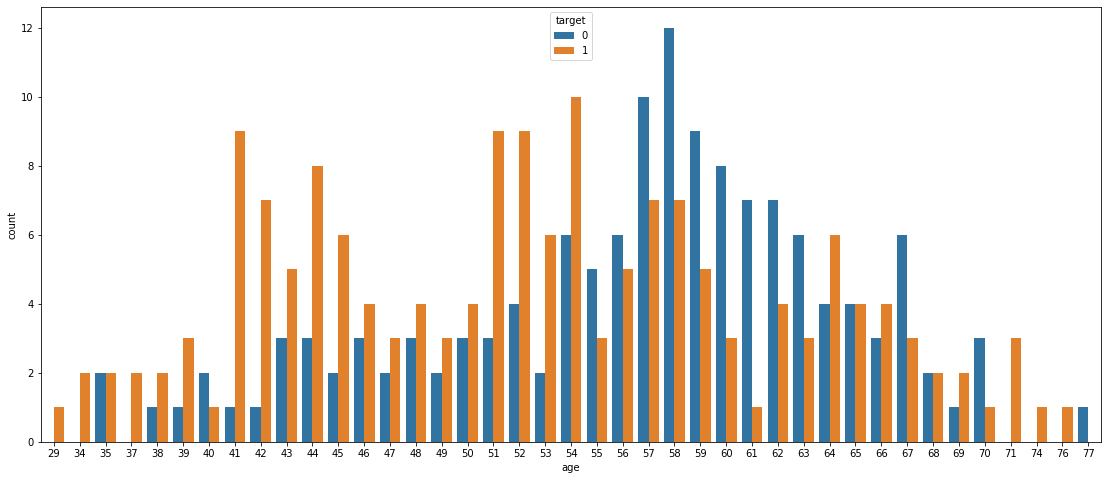

In [8]:
fig,ax= plt.subplots(figsize=(19,8))

sns.countplot(df.age,hue=df.target)

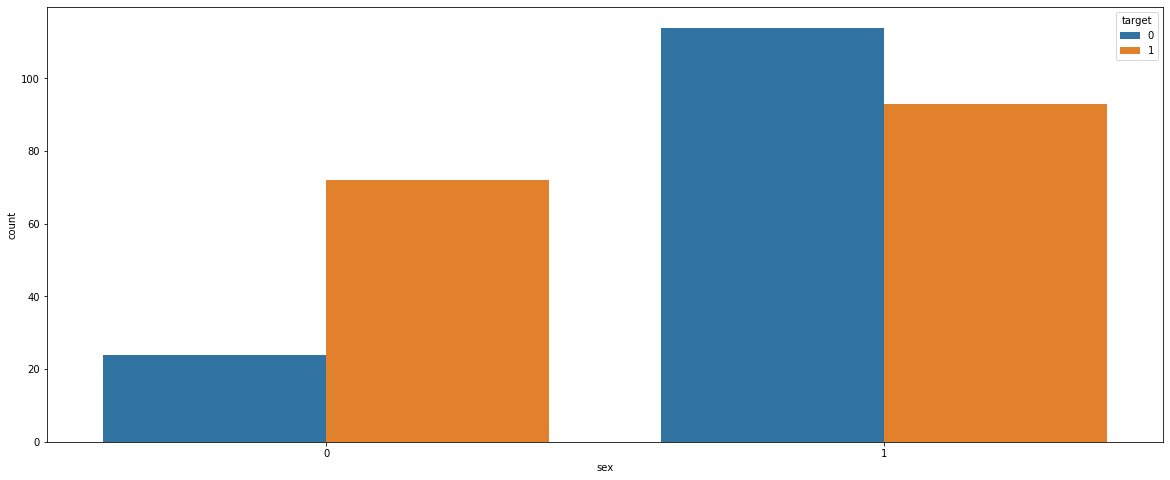

In [9]:
fig,ax=plt.subplots(figsize=(20,8))

sns.countplot(df.sex,hue=df.target)

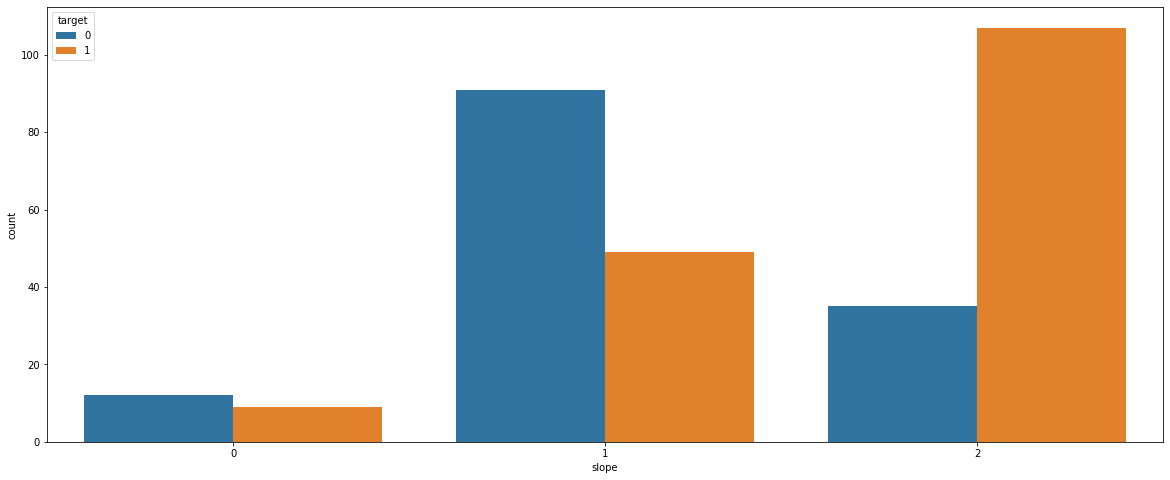

In [10]:
fig,ax=plt.subplots(figsize=(20,8))

sns.countplot(df.slope,hue=df.target)

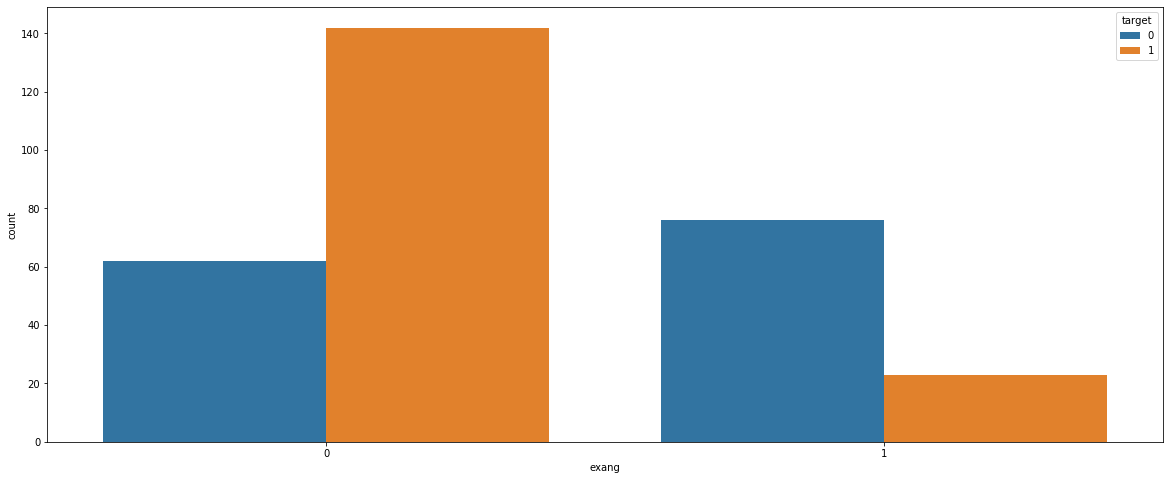

In [11]:
fig,ax=plt.subplots(figsize=(20,8))

sns.countplot(df.exang,hue=df.target)

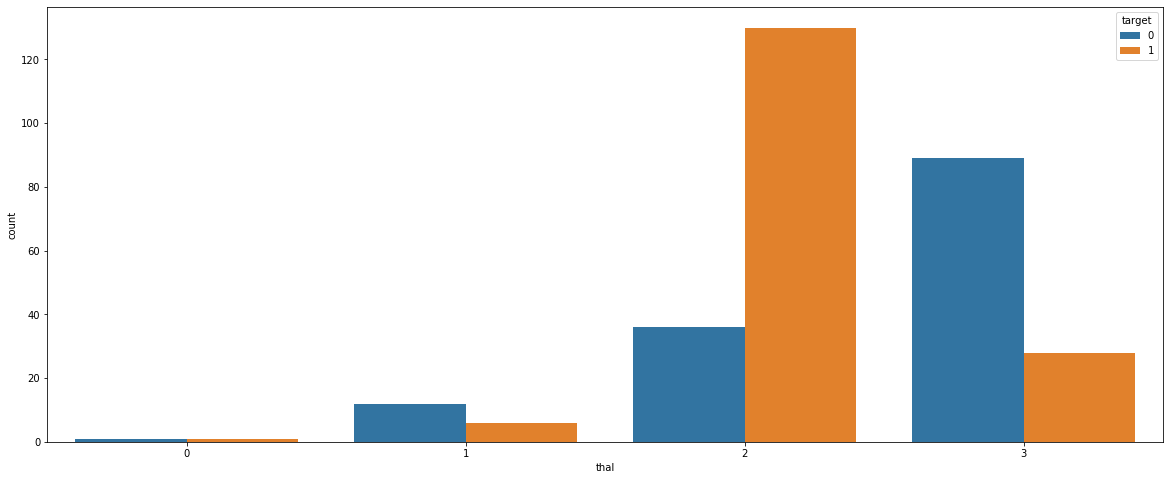

In [12]:
fig,ax=plt.subplots(figsize=(20,8))

sns.countplot(df.thal,hue=df.target)

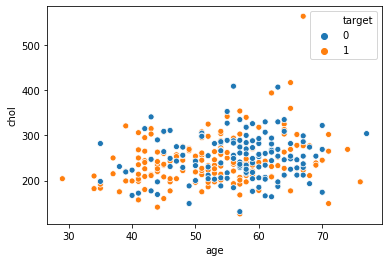

In [13]:
sns.scatterplot(df.age,df.chol,hue=df.target)

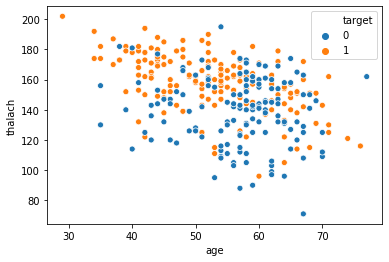

In [14]:
sns.scatterplot(df.age,df.thalach,hue=df.target)

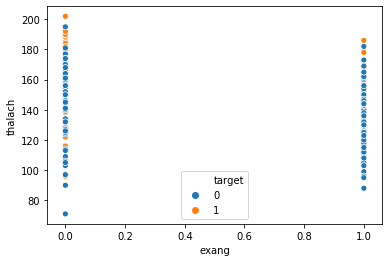

In [15]:
sns.scatterplot(df.exang,df.thalach,hue=df.target)

## Pre-Processing

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
cp = OneHotEncoder()

a = cp.fit_transform(df.cp.values.reshape(-1,1)).toarray()

In [19]:
restecg = OneHotEncoder()

b = restecg.fit_transform(df.restecg.values.reshape(-1,1)).toarray()

In [20]:
slope = OneHotEncoder()

c = slope.fit_transform(df.slope.values.reshape(-1,1)).toarray()

In [21]:
ca = OneHotEncoder()

d = ca.fit_transform(df.ca.values.reshape(-1,1)).toarray()

In [22]:
thal = OneHotEncoder()

e = thal.fit_transform(df.thal.values.reshape(-1,1)).toarray()

In [23]:
a

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [24]:
a=pd.DataFrame(a,columns=['cp_1','cp_2','cp_3','cp_4'])

a.drop('cp_4',axis=1,inplace=True)

a=a.astype(int)

In [25]:
b=pd.DataFrame(b,columns='resecg_1 resecg_2 resecg_3'.split())

b.drop('resecg_3',axis=1,inplace=True)

b=b.astype(int)

In [26]:
c=pd.DataFrame(c,columns='slope_1 slope_2 slope_3'.split())

c.drop('slope_3',axis=1,inplace=True)

c=c.astype(int)

In [27]:
d=pd.DataFrame(d,columns='ca_1 ca_2 ca_3 ca_4 ca_5'.split())

d.drop('ca_5',axis=1,inplace=True)

d=d.astype(int)

In [28]:
e=pd.DataFrame(e,columns='thal_1 thal_2 thal_3 thal_4'.split())

e.drop('thal_4',axis=1,inplace=True)

e=e.astype(int)

## Concating the final datasets

In [29]:
df.drop(['cp','restecg','slope','ca','thal'],axis=1,inplace=True)

In [30]:
df = pd.concat([df,a,b,c,d,e],axis=1)

## Prediction

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [32]:
y=df.target

In [33]:
df.drop('target',axis=1,inplace=True)

In [34]:
x=df

In [35]:
from sklearn.preprocessing import Normalizer

In [36]:
nm2=Normalizer()

x2 = nm2.fit_transform(x)

In [37]:
x2

array([[0.19745987, 0.00313428, 0.45447112, ..., 0.        , 0.00313428,
        0.        ],
       [0.10875006, 0.00293919, 0.3820948 , ..., 0.        , 0.        ,
        0.00293919],
       [0.13682871, 0.        , 0.43384712, ..., 0.        , 0.        ,
        0.00333729],
       ...,
       [0.23673477, 0.00348139, 0.50132068, ..., 0.        , 0.        ,
        0.        ],
       [0.25354016, 0.00444807, 0.57824948, ..., 0.        , 0.        ,
        0.        ],
       [0.17497015, 0.        , 0.39905472, ..., 0.        , 0.        ,
        0.00306965]])

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,random_state=101,test_size=0.2)

In [39]:
model=RandomForestClassifier(n_estimators=100,random_state=45)

model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [40]:
model.score(xtest,ytest)

0.8852459016393442

In [41]:
print(confusion_matrix(model.predict(xtest),ytest))

[[24  0]
 [ 7 30]]


## saving models

In [42]:
from sklearn.externals import joblib

In [43]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [44]:
joblib.dump(ca,'ca.pkl')

['ca.pkl']

In [45]:
joblib.dump(restecg,'restecg.pkl')

['restecg.pkl']

In [46]:
joblib.dump(slope,'slope.pkl')

['slope.pkl']

In [47]:
joblib.dump(cp,'cp.pkl')

['cp.pkl']

In [48]:
joblib.dump(thal,'thal.pkl')

['thal.pkl']

In [51]:
joblib.dump(nm2,'normalize.pkl')

['normalize.pkl']

In [52]:
#to call use joblib.load

In [53]:
model.score(xtest,ytest)

0.8852459016393442